<a href="https://colab.research.google.com/github/RanjithD18/mnist-classification/blob/main/EXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [43]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()


In [44]:
xtrain.shape

(60000, 28, 28)

In [45]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [46]:
single_image=xtrain[10]
single_image.shape

(28, 28)

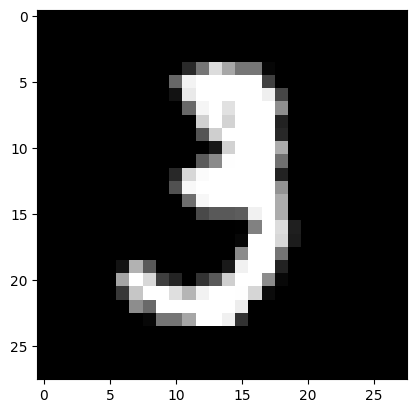

In [47]:
plt.imshow(single_image,cmap="gray")

In [48]:
ytrain[10]

3

In [49]:
xtrain.min()

0

In [50]:
xtrain.max()

255

In [51]:
xtrain_scaled=xtrain/255.0
xtest_scaled=xtest/255.0

xtrain_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [52]:
xtrain_scaled.max()

1.0

In [53]:
ytrain_onehot=utils.to_categorical(ytrain,10)
ytest_onehot=utils.to_categorical(ytest,10)
ytrain_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [54]:
ytrain_onehot.shape

(60000, 10)

In [55]:
ytrain_onehot[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [56]:
xtrain_scaled = xtrain_scaled.reshape(-1,28,28,1)
xtest_scaled = xtest_scaled.reshape(-1,28,28,1)
xtrain_scaled


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [68]:
model=keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [69]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_17 (Dense)            (None, 16)                86544     
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                      

In [70]:
# from keras.utils.sidecar_evaluator import optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [71]:
# from sklearn.utils import validation
model.fit(xtrain_scaled,ytrain_onehot,epochs=10,batch_size=64,validation_data=(xtest_scaled,ytest_onehot))


Epoch 1/10
938/938 [==============================] - 17s 18ms/step - loss: 0.3596 - accuracy: 0.8902 - val_loss: 0.1240 - val_accuracy: 0.9629
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0996 - accuracy: 0.9697 - val_loss: 0.0803 - val_accuracy: 0.9741
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0715 - accuracy: 0.9786 - val_loss: 0.0692 - val_accuracy: 0.9776
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0572 - val_accuracy: 0.9813
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0689 - val_accuracy: 0.9797
Epoch 6/10
938/938 [==============================] - 17s 19ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0470 - val_accuracy: 0.9840
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0606 - val_accuracy:

In [72]:
metrics = pd.DataFrame(model.history.history)

In [73]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.359638,0.890183,0.124024,0.9629
1,0.099590,0.969733,0.080280,0.9741
2,0.071550,0.978633,0.069199,0.9776
3,0.057781,0.982183,0.057195,0.9813
4,0.050037,0.984683,0.068922,0.9797


<Axes: >

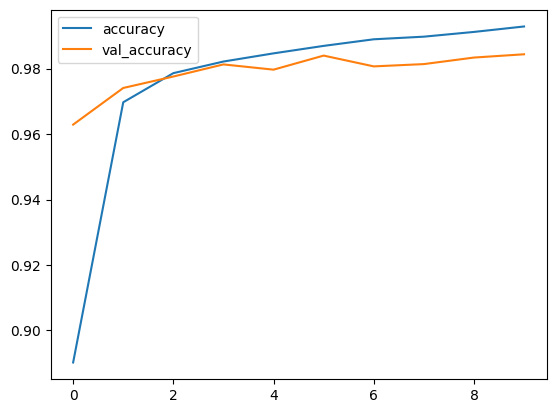

In [74]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

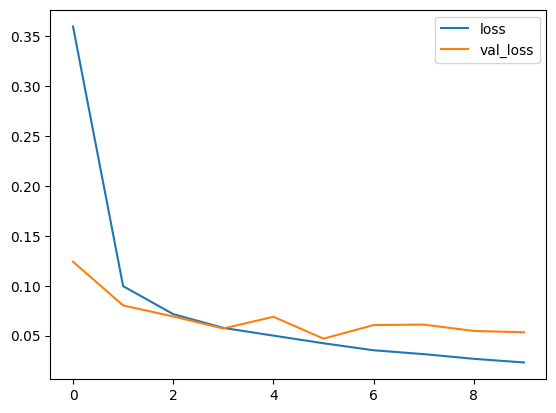

In [75]:
metrics[['loss','val_loss']].plot()

In [76]:
x_test_predictions = np.argmax(model.predict(xtest_scaled), axis=1)

313/313 [==============================] - 1s 3ms/step


In [77]:
print(confusion_matrix(ytest,x_test_predictions))

[[ 977    0    0    1    0    0    2    0    0    0]
 [   0 1132    0    0    2    0    1    0    0    0]
 [   5    8  999    3    6    0    1    7    3    0]
 [   0    0    0  994    0    9    0    0    2    5]
 [   0    0    0    0  974    0    0    1    0    7]
 [   0    0    0    5    0  883    4    0    0    0]
 [   3    3    0    2    1    3  946    0    0    0]
 [   1    4    6    1    0    1    0 1010    1    4]
 [   9    1    2    2    4    2    6    1  942    5]
 [   1    2    0    1    9    4    0    3    2  987]]


In [78]:
print(classification_report(ytest,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

